### Роботу нужно распознавать различные объекты, чтобы с ними взаимодействовать

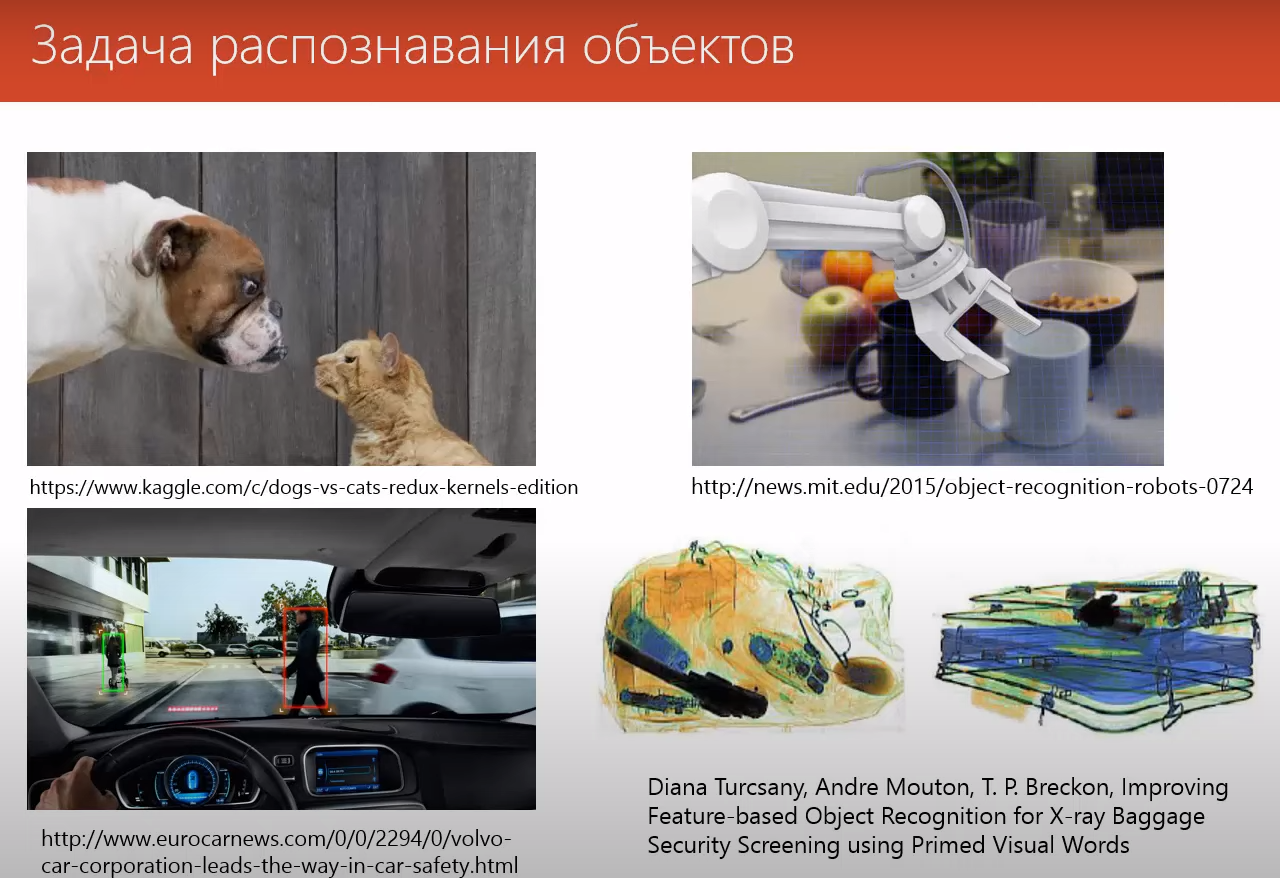

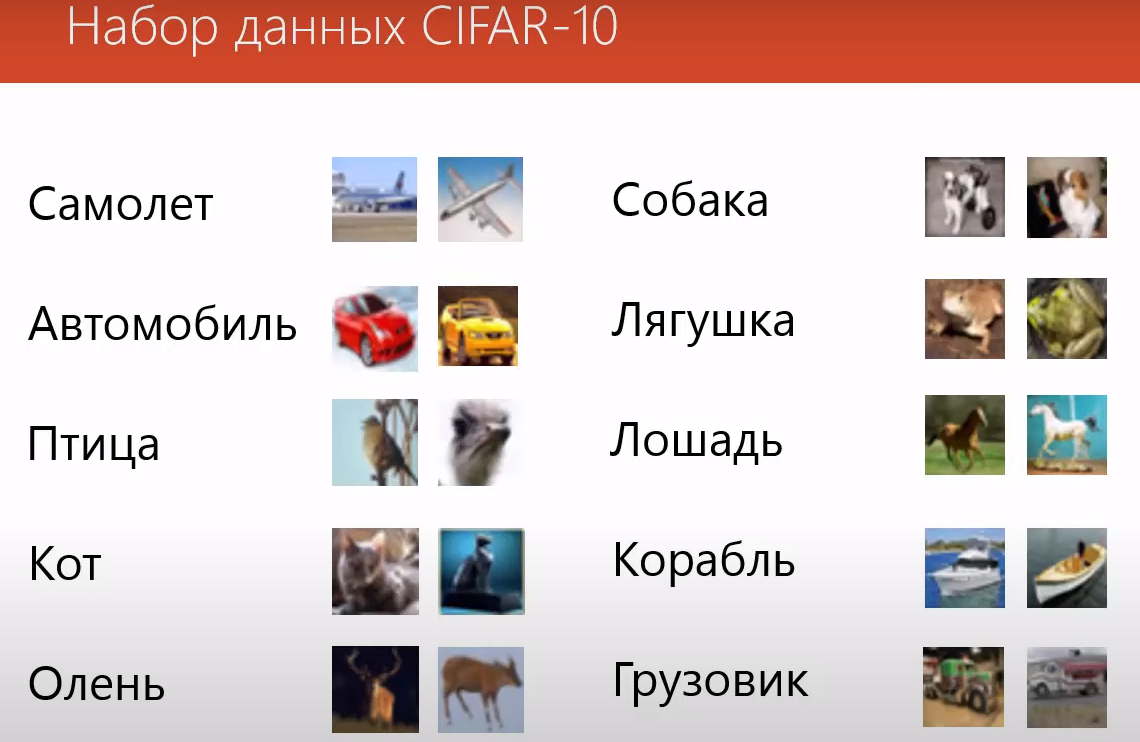

### В наборе 60000 изображений

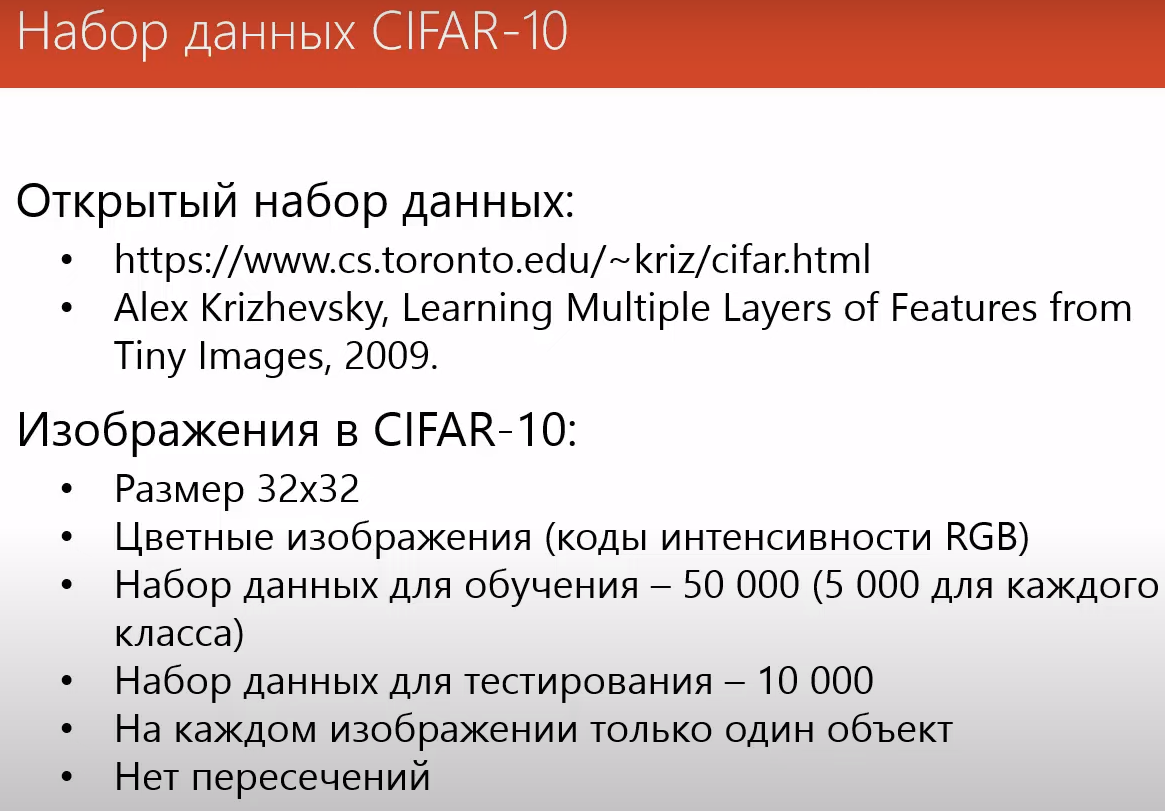

In [5]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import utils

In [6]:
# Для воспроизводимости
np.random.seed(27)
utils.set_random_seed(27)

In [9]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [10]:
# Нормализуем данные
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
# Get Dummies для данных. Преобразование меток классов в категории
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
y_train = utils.to_categorical(x=y_train, num_classes=10)
y_test = utils.to_categorical(x=y_test, num_classes=10)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [39]:
# Создаем модель
model = Sequential(name='Sozykin_Conv2D')

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3), activation='relu', name='1st_Conv2D'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', name='2nd_Conv2D'))
model.add(MaxPooling2D(pool_size=(2, 2), name='1st_MaxPooling2D'))
model.add(Dropout(rate=0.25, name='1st_Dropout'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='3rd_Conv2D'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='4th_Conv2D'))
model.add(MaxPooling2D(pool_size=(2, 2), name='2nd_MaxPooling2D'))
model.add(Dropout(rate=0.25, name='2nd_Dropout'))

model.add(Flatten(name='Flatten'))  # Преобразование из двумерного вида в плоский
model.add(Dense(units=512, activation='relu', name='Dense'))
model.add(Dropout(rate=0.25, name='3rd_Dropout'))
model.add(Dense(units=10, activation='softmax', name='Output'))  # Softmax отвечает за вероятность принадлежности к классам

model.summary()

Model: "Sozykin_Conv2D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ 1st_Conv2D (Conv2D)                  │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 2nd_Conv2D (Conv2D)                  │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1st_MaxPooling2D (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1st_Dropout (Dropout)                │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 3rd_Conv2D (Conv2D)                  │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 4th_Conv2D (Conv2D)                  │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 2nd_MaxPooling2D (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 2nd_Dropout (Dropout)                │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 3rd_Dropout (Dropout)                │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

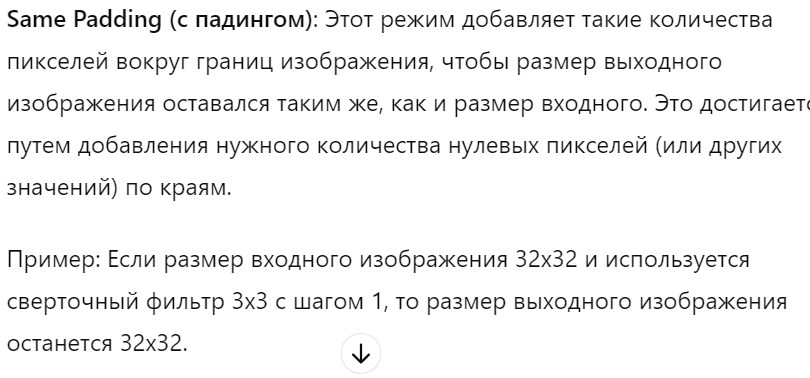

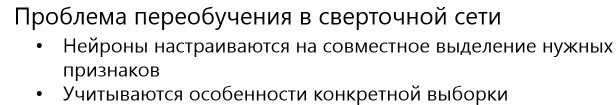

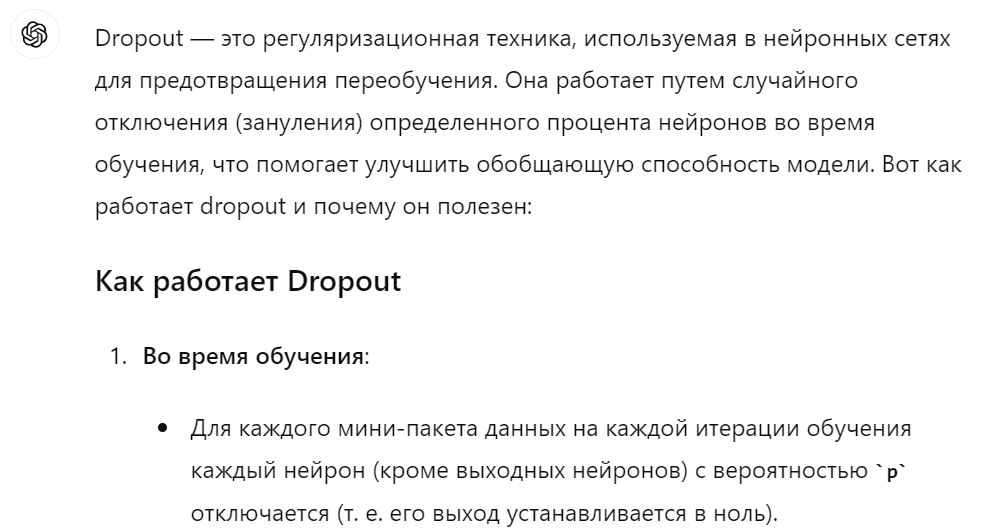

In [40]:
# Компилируем модель
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [51]:
%%time
# Обучаем модель
history = model.fit(X_train, y_train, batch_size=32, epochs=1, validation_split=0.1, shuffle=True)  # Эпох может быть больше (на каждую около 40 сек)
history.history

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 38ms/step - accuracy: 0.4637 - loss: 1.4805 - val_accuracy: 0.5076 - val_loss: 1.3571
CPU times: total: 39.2 s
Wall time: 54 s


{'accuracy': [0.47242221236228943],
 'loss': [1.455601453781128],
 'val_accuracy': [0.5076000094413757],
 'val_loss': [1.3571218252182007]}

# Batch size указывает на то, что изменения весов происходит после обработки каждых 32-х объектов

In [52]:
scores = model.evaluate(X_test, y_test)
print(f'Точность модели: {scores[1] * 100:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5118 - loss: 1.3531
Точность модели: 50.6900


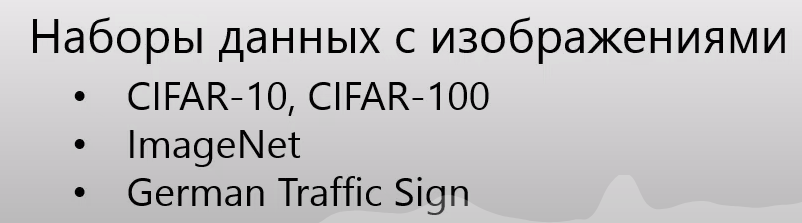